In [3]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data

df = pd.read_csv('movies.csv')


In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
#Checking for missing values
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [9]:
#Filling out missing values with zero, whereever possible
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [11]:
#Changing data types of few columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [13]:
#Data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [17]:
#found that year and relased date dont always allign together, so i will create a new column year_correct
df['yearcorrect'] = df['released'].astype(str).str.extract(r'(\d{4})')

In [19]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [21]:
#Looking at the entire data
pd.set_option('display.max_rows',None)

In [23]:
#Drop duplicates
df=df.drop_duplicates()

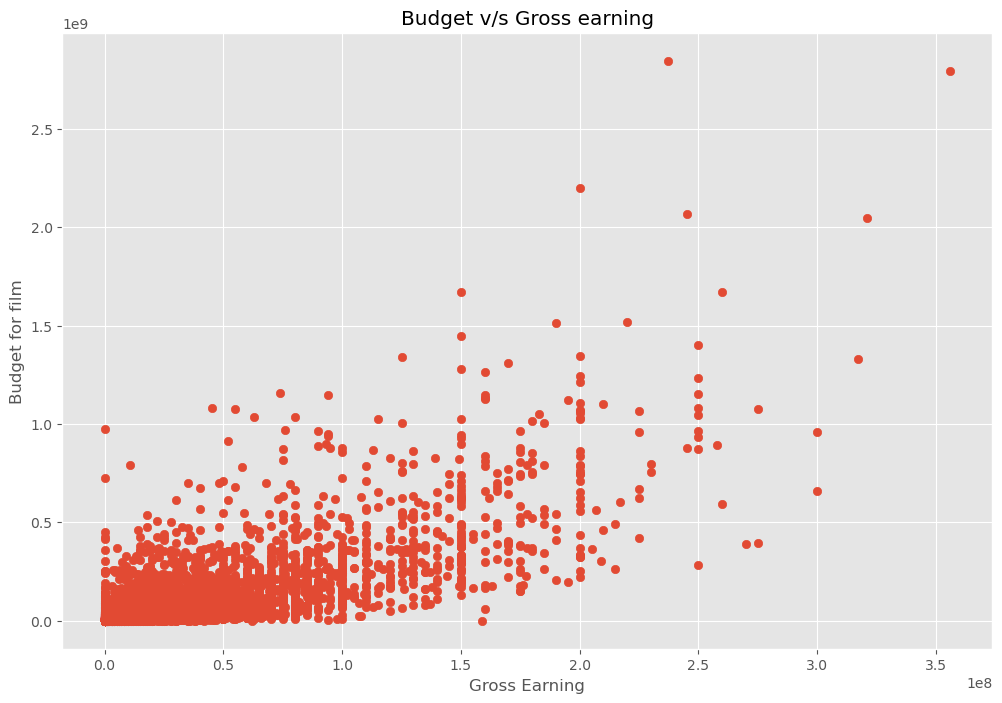

In [25]:
#Scatter plot with budget v/s gross earnings
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget v/s Gross earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for film')
plt.show()

<Axes: xlabel='gross', ylabel='budget'>

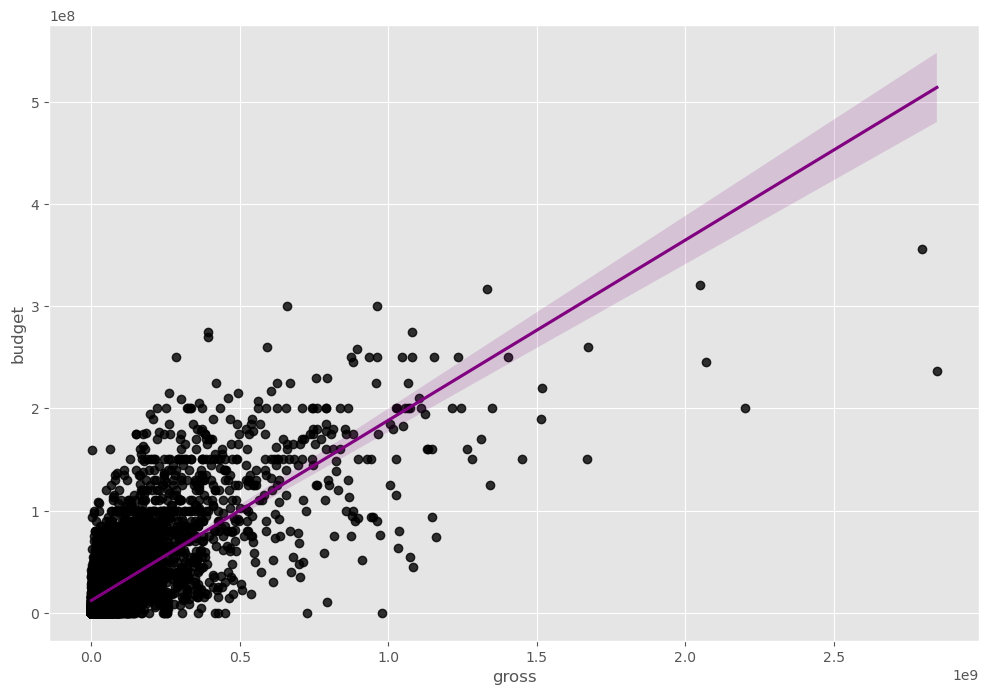

In [27]:
 #Plot using seaborn


sns.regplot(x="gross", y="budget", data=df,scatter_kws={"color":"black"},line_kws={"color":"Purple"})

In [33]:
#Looking at Correlation
print(df.select_dtypes(include=['number']).columns)

Index(['year', 'score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')


In [35]:
df.select_dtypes(include=['number']).corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


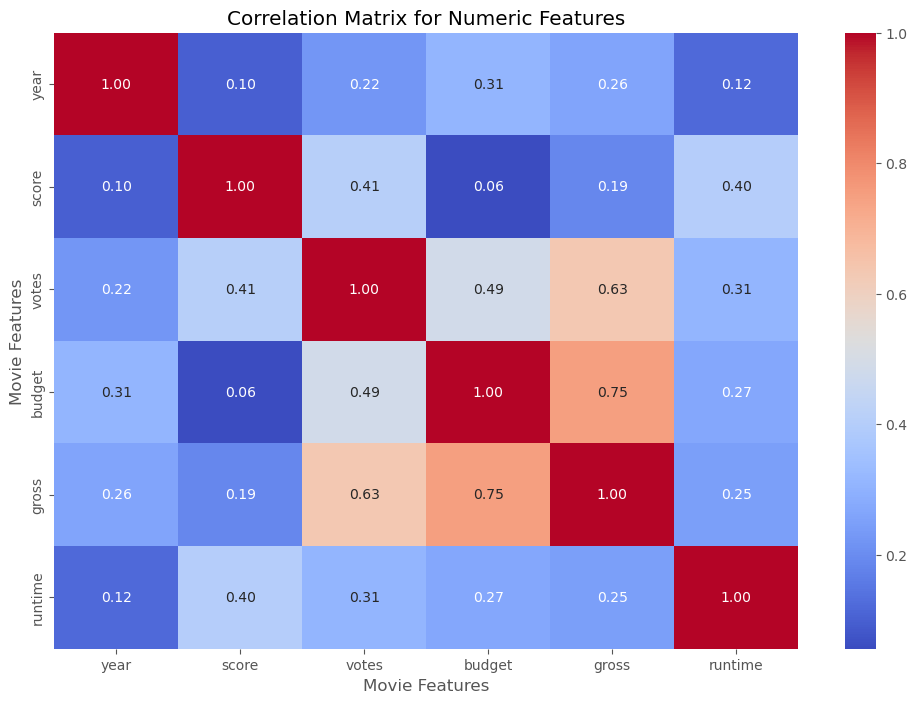

In [39]:
# Step 1: Filter numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Compute correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Step 3: Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [41]:
#Looking at company correlation
#Representing each individual company and other string type columns in terms of unique numbers
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized.head()              

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


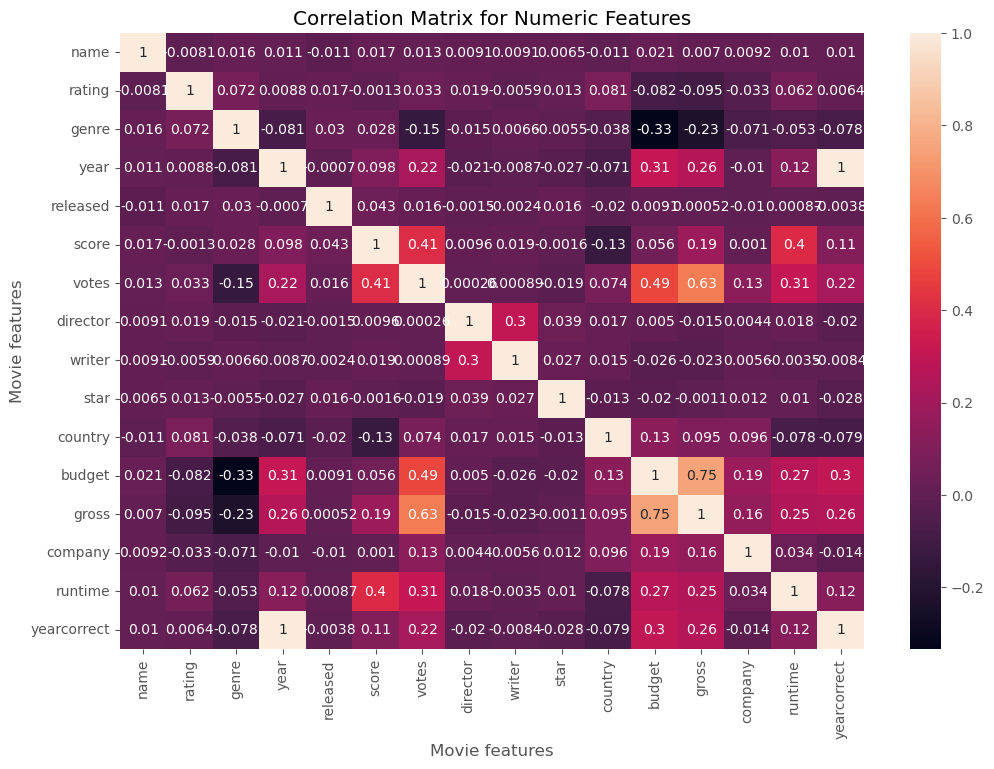

In [43]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [45]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [47]:
sorted_pair=corr_pairs.sort_values()
sorted_pair

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      yearcorrect   -0.079009
yearcorrect  country       -0.079009
runtime      country       -0.078412
country      runtime       -0.078412
yearcorrect  genre         -0.078210
genre        yearcorrect   -0.078210
             company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
country      genre         -0.037615
g

In [49]:
High_corr=sorted_pair[(sorted_pair)>0.5]
High_corr

gross        votes          0.632834
votes        gross          0.632834
gross        budget         0.750157
budget       gross          0.750157
yearcorrect  year           0.996397
year         yearcorrect    0.996397
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Conclusion
#Gross and budget have the highest correlation to gross earning